In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

sns.set()
sns.set(font='SimHei')

In [2]:
dataSet = pd.read_csv('douban.csv')
dataSet = dataSet.drop('id', axis=1).drop('douban_id', axis=1)
dataSet.describe()

,collections,rating_num,five_star,four_star,three_star,two_star,one_star
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,56943.774257,4.904752,0.054139,0.121224,0.308141,0.256164,0.260323
std,93215.824983,1.295236,0.060278,0.114427,0.144731,0.108302,0.228702
min,67.000000,2.100000,0.000000,0.000000,0.000000,0.005000,0.002000
25%,2229.000000,3.900000,0.023000,0.039000,0.189000,0.181000,0.072000
50%,19289.000000,4.900000,0.036000,0.082000,0.320000,0.275000,0.197000
75%,68560.000000,5.800000,0.061000,0.160000,0.427000,0.340000,0.404000
max,589938.000000,8.600000,0.593000,0.535000,0.607000,0.479000,0.989000


In [3]:
star_list = list()
dataSet = dataSet.drop(dataSet.columns[[0, -1,-2,-3,-4,-5,-6]], axis=1)
dataSet['star'].apply(lambda x:star_list.extend(x.split('_')))
star_list = list(set(star_list))
star_list

['尼克·图恩',
 '哈莉·福特',
 '李治廷',
 '尼古拉斯·霍尔特',
 '陈震',
 '詹姆斯·柯登',
 ' 崔在燮',
 '王野苓',
 '夏尉喻',
 '波瑞斯·科乔',
 '刘诗诗',
 '贾斯汀·塞洛克斯',
 '钟超',
 '易志乐',
 '花钰杰',
 '谢欣颖',
 '克里斯托弗·沃尔兹',
 '刘蓓',
 '杨宝玲',
 '杜建桥',
 '尼克·斯旺森',
 '连凯',
 '文章',
 '莉·恩斯林',
 '尤金尼奥·米拉',
 '克里斯蒂娜·亨德里克斯',
 '埃迪·马森',
 '胡军',
 '马丽',
 '拉哈特·亚当斯',
 '张晋',
 '张逸杰',
 '狄威',
 '艺涵',
 '金晨',
 '曼迪·摩尔',
 '韦德·威廉姆斯',
 '房黛薇',
 '中村让',
 '王子璇',
 '都金翰',
 '李伟菘',
 '斯坦·李',
 '巴格·霍尔',
 '方中信',
 '拉里·派恩',
 '关凯元',
 '托尼·考克斯',
 '安德鲁·詹金斯',
 '张承阳',
 '王敏德 ',
 '盖玥希',
 '厉娜',
 '姜大卫',
 '郑文政',
 '武井咲',
 '韩彦博',
 '陈赫',
 '田亮',
 '郑秀妍',
 '思漩',
 '菲奥娜·格拉斯科特',
 '李欣烨',
 '余光洪',
 '洪智允',
 '崔志佳',
 '卡梅隆·迪亚兹',
 '郑海音',
 '伊莎贝拉·莫奈',
 '金士杰',
 '尼克·里昂',
 '斯蒂芬妮·科尔',
 'Justin Matthews',
 '刘靖宇',
 '凯瑟琳·勒',
 '伊科·乌艾斯',
 'Dean McKendrick',
 '蒂姆·王',
 '蓝燕',
 '蒋一帆',
 '海一天',
 '约翰·麦克菲尔森',
 '王水林',
 '张天馨',
 '冯德伦',
 '张诚航',
 '奚望',
 '吴俊余',
 '代超',
 '骆佳',
 '乔·怀特',
 '乔纳森·本内特',
 '克里斯·奥哈拉',
 '孙修雅',
 '王姬',
 '陈冲',
 '索朗尼玛',
 '阿兰·里奇森',
 '严屹宽',
 '周子瑜',
 '克里斯蒂安·孔特雷拉斯',
 '艾莉森·萨多尔',
 '王紫垣',
 '王佑硕',
 '杰西卡·加莱蒂',
 '姜宏波',
 '乔杉',
 '汤米·李·琼斯',
 

In [4]:
df = pd.concat([dataSet, pd.DataFrame(columns=star_list)], sort=False)
df[star_list] = df[star_list].fillna(0)
def set_status(series):
    tag = series['star'].split('_')
    for t in tag:
        series[t] = 1
    return series

df[star_list] = df[['star', *star_list]].apply(lambda x:set_status(x), axis=1).drop('star', axis=1)
df = df.drop('star', axis=1)
df

,director,screenwriter,tag,region,language,release_time,film_length,collections,rating_num,尼克·图恩,...,李幼斌,阿曼德拉·斯坦伯格,菊地凛子,罗伯·布莱顿,苗侨伟,汤姆·斯威特,韩莹棣,托姆·威廉姆斯,尼古拉斯·霍普,梅丽莎·博洛纳
0,闫非,彭大魔,喜剧,中国大陆,汉语普通话,2018-07-27(中国大陆),118分钟,520018.0,6.6,0,...,0,0,0,0,0,0,0,0,0,0
1,叶伟民,文隽,动作,中国大陆 / 香港,汉语普通话 / 粤语,2018-11-02(中国大陆),87分钟,6235.0,2.6,0,...,0,0,0,0,0,0,0,0,0,0
2,萧锋,陈枰,动作,中国大陆,汉语普通话 / 英语,2018-10-26(美国),132分钟,7726.0,2.7,0,...,0,0,0,0,0,0,0,0,0,0
3,刘杰,刘杰,剧情,中国大陆,汉语普通话,2018-10-19(中国大陆)_2018-09-09(多伦多电影节),96分钟,29414.0,5.2,0,...,0,0,0,0,0,0,0,0,0,0
4,何炅,迪丽热巴,真人秀,中国大陆,汉语普通话,2018-10-12(中国大陆),157分钟,38155.0,2.1,0,...,0,0,0,0,0,0,0,0,0,0
5,袁和平,徐克,动作,中国大陆 / 香港,汉语普通话,2017-12-14(中国大陆),113分钟,91456.0,4.4,0,...,0,0,0,0,0,0,0,0,0,0
6,韩杰,宋啸,剧情,中国大陆,汉语普通话,2017-12-29(中国大陆),109分钟,91375.0,5.0,0,...,0,0,0,0,0,0,0,0,0,0
7,吴克群,吴克群,喜剧,中国大陆,汉语普通话,2018-10-26(中国大陆),105分钟,2313.0,3.9,0,...,0,0,0,0,0,0,0,0,0,0
8,何念,马天,喜剧,中国大陆,汉语普通话,2018-04-20(中国大陆),96分钟,37819.0,4.6,0,...,0,0,0,0,0,0,0,0,0,0
9,李海蜀,黄彦威,喜剧,中国大陆,汉语普通话,2017-04-20(中国大陆),108分钟,40339.0,4.8,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def get_minute(string):
    time = re.findall(r'\d+', string)[0]
    return int(time)

df['film_length'] = df['film_length'].apply(lambda x: get_minute(x))
df.head(5)

,director,screenwriter,tag,region,language,release_time,film_length,collections,rating_num,尼克·图恩,...,李幼斌,阿曼德拉·斯坦伯格,菊地凛子,罗伯·布莱顿,苗侨伟,汤姆·斯威特,韩莹棣,托姆·威廉姆斯,尼古拉斯·霍普,梅丽莎·博洛纳
0,闫非,彭大魔,喜剧,中国大陆,汉语普通话,2018-07-27(中国大陆),118,520018.0,6.6,0,...,0,0,0,0,0,0,0,0,0,0
1,叶伟民,文隽,动作,中国大陆 / 香港,汉语普通话 / 粤语,2018-11-02(中国大陆),87,6235.0,2.6,0,...,0,0,0,0,0,0,0,0,0,0
2,萧锋,陈枰,动作,中国大陆,汉语普通话 / 英语,2018-10-26(美国),132,7726.0,2.7,0,...,0,0,0,0,0,0,0,0,0,0
3,刘杰,刘杰,剧情,中国大陆,汉语普通话,2018-10-19(中国大陆)_2018-09-09(多伦多电影节),96,29414.0,5.2,0,...,0,0,0,0,0,0,0,0,0,0
4,何炅,迪丽热巴,真人秀,中国大陆,汉语普通话,2018-10-12(中国大陆),157,38155.0,2.1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_tmp_1 = pd.concat([df, pd.DataFrame(columns=['year', 'month', 'day'])], sort=False)
df_tmp_1[['year', 'month', 'day']] = df_tmp_1[['year', 'month', 'day']].fillna(0)

def get_date(data):
    try:
        time = re.findall(r'\d{4}-\d+-\d+', data[5])
        time_list = time[0].split('-')
        data['year'] = int(time_list[0])
        data['month'] = int(time_list[1])
        data['day'] = int(time_list[2])
        return data
    except Exception as e:
        return None
    
df_tmp_1 = df_tmp_1.apply(lambda x: get_date(x), axis=1).dropna().reset_index().drop('index', axis=1).drop('release_time', axis=1)

# 数据可视化

## 演员十大劳模

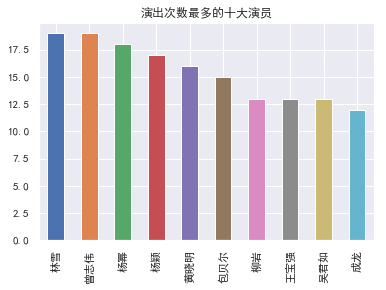

In [7]:
star_list = df_tmp_1.iloc[:, 8:-3].reset_index().drop('index', axis=1)
count_list  = star_list.apply(lambda x:x.sum()).sort_values(ascending=False)
count_list[:10].plot.bar(title='演出次数最多的十大演员')

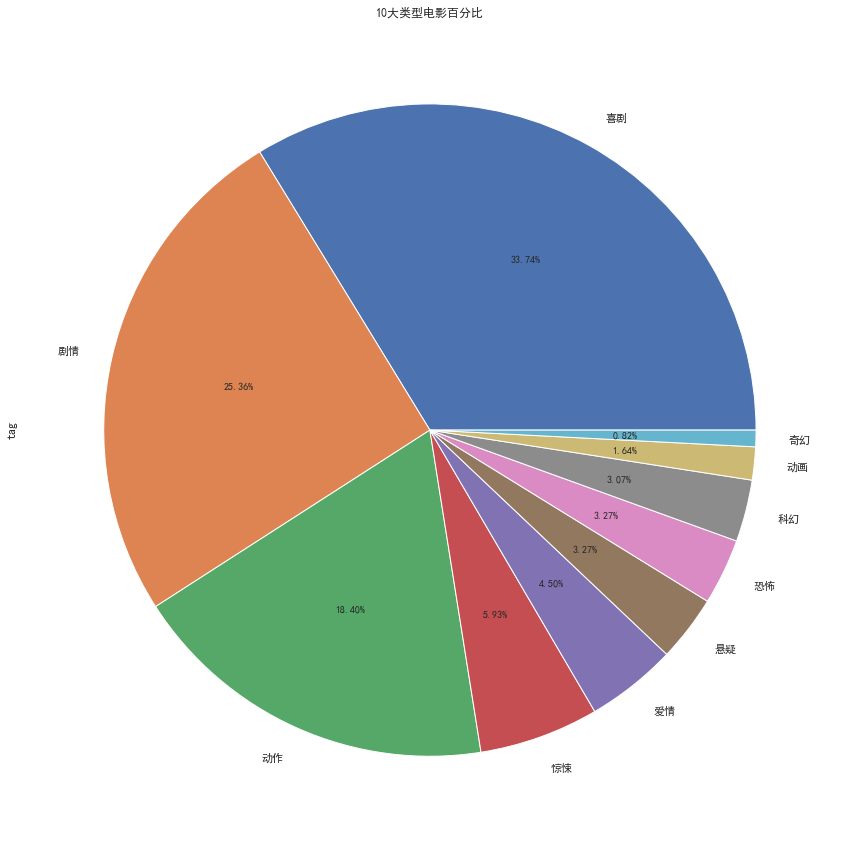

In [8]:
df_tmp_1['tag'].value_counts()[:10].plot.pie(figsize=(15, 15), autopct='%1.2f%%', title="10大类型电影百分比")

In [9]:
def set_star_rate(series):
    return series[1:].apply(lambda x:x and series[0])

star_rate_list = df_tmp_1.iloc[:, 7:-3].reset_index().drop('index', axis=1).apply(lambda x:set_star_rate(x), axis=1)
rate_mean_list = star_rate_list.apply(lambda x:x[x>0].mean())

In [10]:
rate_mean_list.sort_values(ascending=False)[:10]

史蒂夫·佩姆伯顿    8.6
丹尼斯·劳森      8.6
罗宾·贝里       8.6
里斯·谢尔史密斯    8.6
斯蒂芬妮·科尔     8.6
里奇·基伯       8.6
崔恩重         8.3
吴世勋         8.3
关海山         8.2
何佩仪         8.2
dtype: float64

In [11]:
one_hot_list = pd.get_dummies(df_tmp_1[['director', 'screenwriter','tag','region','language']])
df_result = pd.merge(df_tmp_1.drop(df_tmp_1.columns[[0,1,2,3,4]], axis=1), one_hot_list, left_index=True, right_index=True)
df_result.head(10)

,film_length,collections,rating_num,尼克·图恩,哈莉·福特,李治廷,尼古拉斯·霍尔特,陈震,詹姆斯·柯登,崔在燮,...,language_英语 / 汉语普通话 / 阿拉伯语,language_英语 / 法语 / 德语 / 阿拉伯语,language_英语 / 瑞典语,language_英语 / 瑞典语 / 丹麦语,language_英语 / 粤语,language_英语 / 粤语 / 汉语普通话,language_英语 / 西班牙语,language_英语 / 越南语 / 日语,language_英语 / 韩语,language_韩语
0,118.0,520018.0,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,87.0,6235.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,132.0,7726.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,96.0,29414.0,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,157.0,38155.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,113.0,91456.0,4.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,109.0,91375.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,105.0,2313.0,3.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,96.0,37819.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,108.0,40339.0,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = df_result[df_result.columns.difference(['rating_num'])].values
Y = df_result['rating_num'].values
sc_X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(sc_X, Y, test_size=0.2)

In [13]:
ada = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=20), learning_rate=0.0001).fit(X_train, Y_train)
pred = ada.predict(X_test)

In [14]:
pd.DataFrame(np.concatenate((Y_test.reshape(-1,1), pred.reshape(-1,1)),axis=1), columns=['pred', 'Y_test'])

,pred,Y_test
0,5.0,4.350
1,4.4,5.085
2,6.0,5.085
3,3.1,5.010
4,6.7,5.865
5,5.2,4.930
6,2.4,3.905
7,4.5,4.885
8,4.9,6.525
9,4.6,4.640


In [15]:
print ("MAE:",metrics.mean_absolute_error(Y_test, pred))

# calculate MSE using scikit-learn
print ("MSE:",metrics.mean_squared_error(Y_test, pred))

# calculate RMSE using scikit-learn
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred)))

# calculate R2 using scikit-learn
print ("R2:",metrics.r2_score(Y_test, pred))

MAE: 0.6722727272727272
MSE: 0.6938744949494947
RMSE: 0.832991293441591
R2: 0.5471700273802216
